# La transformada continua Wavelet 
***

### Sinopsis

*__Datos:__ 3 segundos de registro EEG lóbulo occipital muestreados a 500 Hz bajo condiciones de relajación con los ojos cerrados.* <br>
*__Objetivo:__ Conocer, definir e implementar la transformada contínua wavelet para señales no estacionarias.* <br>
*__Herramientas:__ Wavelets, Transformada Contínua Wavelet.* <br>

### Introducción

Cuando se busca realizar algún método de análisis y/o procesamiento de señales, un requisito usual en éstos métodos, tales como la Transformada de Fourier, es la estacionariedad. Ésta característica de ciertas señales describe que a lo largo de la serie de tiempo sus propiedades estadísticas no cambian a lo largodel tiempo, algo que muchas veces o inclusive nunca es logra en señales de orígen biológico como lo es el caso de la electroencefalografía. Por esta razón, en términos prácticos muchas veces se asume la estacionariedad en un término más flexible llamado "estacionariedad en sentido amplio", el cual requiere una media constante y una función de correlación invariante en el tiempo.  Sin embargo, para una señal con media distinta de cero el equivalente para esta condición en el dominio de la frecuencia es que cuente con un espectro invariante en el tiempo. Por este motivo, en la práctica para emplear los métodos de análisis y procesamiento convencionales es necesario implementarlos sobre segmentos de tiempo cortos donde sea posible considerar a la señal como estacionaria estricta o en sentido amplio. La duración  para estos segmentos varía y depende del tipo de señal que se busque analizar, en el caso de resitros de EEG los segmentos pueden ser hasta de 20 segundos de duración (Cassani & Falk, 2019). De aquí surge la necesidad de contar con una representación  capaz de regristrar los cambios en el contenido de la frecuencia a lo largo del tiempo para llevar a cabo un análisis frecuencial sobre señales no estacionarias, es decir, se requiere de la construcción de una representación espectro-temporal la cuál puede ser obtenida mediante distintos métodos como lo son: 
<br>

    - Transformada Corta de Fourier (STFT)
    - Transformada Hilbert  (HT)
    - Transformada Continua Wavelet (CWT)

### Dominio Tiempo y Frecuencia

Un elemento fundamental en el análisis y procesamiento de señales es la capacidad de representar señales en el dominio temporal y frecuencial mediante transformaciones matemáticas reversibles. Si bien existen muchos métodos para realizar estas transformaciones, el más utilizado es la transformada de Fourier y la transformada de Fourier inversa, que realizan la transformación tiempo-a-frecuencia y frecuencia-a-tiempo respectivamente. Matemáticamente se definen como sigue

<script type="text/x-mathjax-config">
MathJax.Hub.Config({
tex2jax: {
inlineMath: [['$','$'], ['\\(','\\)']],
processEscapes: true},
jax: ["input/TeX","input/MathML","input/AsciiMath","output/CommonHTML"],
extensions: ["tex2jax.js","mml2jax.js","asciimath2jax.js","MathMenu.js","MathZoom.js","AssistiveMML.js", "[Contrib]/a11y/accessibility-menu.js"],
TeX: {
extensions: ["AMSmath.js","AMSsymbols.js","noErrors.js","noUndefined.js"],
equationNumbers: {
autoNumber: "AMS"
}
}
});
</script>

<p align="center">
    $$ X(\omega) = \mathcal{F}\{x(t)\} = \frac{1}{\sqrt{2\pi}}\int^{\infty}_{-\infty} x(t) e^{-i2\pi\omega t}dt$$
    <br>
    $$ x(t) = \mathcal{F}^{-1}\{X(\omega)\} =\frac{1}{\sqrt{2\pi}} \int^{\infty}_{-\infty} X(\omega) e^{i2\pi\omega t}d\omega$$
</p>

Donde $\mathcal{F}\{\cdot\}$ y $\mathcal{F}^{-1}\{ \cdot\}$ denotan la transformada de Fourier (TF) y la transformada inversa (TFI) respectivamente; $x(t)$ es la señal en el dominio del tiempo; $X(\omega)$ es una función compleja llamado espectro de $x(t)$ que bien puede escribirse como:

$$X(\omega) = ||X(\omega)||e^{i\theta(\omega)}$$

donde $||X(\omega)||$ es la amplitud espectral con una fase $\theta(\omega)$ asociada. En general, $||X(\omega)||$ representa la amplitud para dada frecuencia $\omega$, con la cual se obtiene una representación usual en el dominio de la frecuencia que es la densidad espectral de energía $||X(\omega)||^2$, la cual muestra la distribución de la energía de la señal para distintas frecuencias; es decir, el área bajo la curva $||X(\omega)||^2$ entre $f_0-df$ y $f_0+df$ representa la energía de la componente $f_0$ en Hz.

Ocurre un caso especial en el caso de TF para funciones $x(t)$ reales, en el cuál su espectro correspondiente presenta simetria Hermitiana, es decir las componentes espectrales para funciones negativas son equivalentes al complejo conjugado de las componentes para frecuencias positivas, es decir:

$$X(\omega) = X^{*}(-f) \Rightarrow ||X(\omega)|| = ||X^{*}(-f)|| $$

Como consecuencia, la representación del espectro de señales reales se realiza solo para frecuencias positivas, por consiguiente para conservar la correcta relación entre componentes frecuenciales y su respectiva amplitud $||X(\omega)||$ y potencia $||X(\omega)||^2$, se deben duplicar los valores. 

Una cualidad importante que es útil y sencilla para corroborar que se realice una correcta transformada de Fourier es mediante la "Relación de Parseval" la cual demuestra que la TF es una operación unitaria, es decir, la integral (o la suma en el caso discreto) del cuadrado de una función es igual a la integral (o suma) del cuadrado de su transformada. Matemáticamente se expresa como:

$$\int_{-\infty}^{\infty} ||x(t)||^2 dt = \int_{-\infty}^{\infty} ||X(\omega)||^2 d\omega$$

O en su versión discreta, donde $X[j]$ representa la TFD de $x[n]$ :

$$\sum^{N-1}_{n=0}|x[n]|^2 = \frac{1}{N}\sum^{N-1}_{n=0} |X[j]|^2 $$
Como ejercicio podemos emplear el código presentado en el módulo "La electroencefalografía" para obtener y graficar la TF y comprobar la Relación Parseval:

##### Importe de paqueterías

In [3]:
import pandas as pd  #Paq. p-manejo de archivos de datos
import scipy as sc  #Paq. p-análisis numérico 
import numpy as np  #Paq. p-cálculo numérico
import matplotlib   #Paq. p-graficación
import matplotlib.pyplot as plt
import os.path as os #Paq. p-despliegue de ruta

##### Importación de los datos

In [4]:
#Una variable para la dirección de nuestros archivos
path = os.abspath('C:/Users/Andrew S/Documents/Trabajo/Fisica Biomedica/8vo/Servicio Social/')
#Asociamos una variable al objeto DataFrame creado apartir del archivo extensión csv
data = pd.read_csv(path +'/Jenny.csv')
EEG = data['meditacion'] #Señal EEG en reposo

##### Relación de Parseval

A continuación realizamos el cálculo de la TF haciendo uso del algoritmo de FFT, posteriormente comprobamos la relación definiendo una función que realice la "integración", es decir la suma de los valores absolutos cuadrados i de la serie.

In [5]:
def Suma (x): #La función recibira una variable de tipo array
    suma = 0 #Definimos el valor inicial de la suma en 0
    for i in range(len(x)): #iniciamos un ciclo for durante el cual se realizará la operación
        suma += abs(x[i])**2 #iterativamente sumamos el valor anterior de la variable más el elemento i del array
    return suma

In [6]:
P1_time = Suma(EEG) #Obtenemos la suma del array 'x^2' y lo asignamos a una nueva variable
P2_frequency = 1/N * Suma(sc.fft(EEG)) #Realizamos el procedimiento análogo para el array del dominio de las frecuencias
P1_time // P2_frequency

NameError: name 'N' is not defined

### Operaciones fundamentales

#### El producto interior

La primera de las operaciones fundamentales que vale la pena revisar, es el producto interior en el espacio de funciones contínuas, cuya definición facilmente puede traspasarse hacia el caso discreto. Podemos entender esta operación como el producto de dadas funciones $f$ y $g^*$, el conjugado de la función $g$, evaluadas punto a punto y la posterior suma de todas estas operaciones, procedurualmente es el mismo razonamiento que realizabamos para el producto punto de vectores en $\mathbb{R}^n$ donde para dados vectores $\vec{a},\vec{b} \in \mathbb{R}^n$ su producto interior se define como:

$$\vec{a}\cdot \vec{b} = \sum_{i=1}^{n} a_{i}b_{i} $$

LLevándo este razonamiento, es claro entender el significado de la operación, la cual formalmente se define como:

$$<f(t),g(t)> = \int_{-\infty}^{\infty} f(t)g(t)^* dt$$

Retomando la definición del producto interior (producto punto) entre dos vectores en $\mathbb{R}^n$ la definición del producto interior para funciones en el caso discreto se vuelve sencilla, para dadas series $f_n$ y $g_n$ con $n$ puntos, su producto interior se define como:

$$<f_n,g_n> =  \sum_{i=1}^{n} f[i]g[i]^*$$

De esta definición es posible crear muy fácilmente una función en Python que realice el producto interior entre dos series (arrays) como sigue:

In [186]:
def p_interior(f,g): #Definimos nuestra función para dos arrays f y g que deberán tener la misma longitud de puntos
    resultado = 0 #Nombramos a la variable donde almacenaremos el resultado con su valor inicial
    for i in range(len(f)): #Establecemos un bucle para las operaciones iterativas
        resultado += f[i]*g[i] #Obtenemos el producto de los elementos f_i y g_i y lo sumamos iterativamente
    return resultado #La función arroja el resultado del producto interior

Aplicamos nuestra función p_interior para verificar su resultado

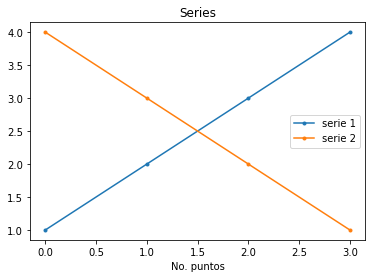

In [301]:
'''Generamos unas series muestra para ejemplificar la función'''

f_1 = np.arange(1,5) #La serie 1 es una secuencia de puntos unitarios del 1 al 5
g_1 = np.flip(f_1) #La serie 2 es la misma secuencia pero de forma inversa
plt.plot(f_1,'.-',label='serie 1') 
plt.plot(g_1,'.-',label='serie 2')
plt.legend()
plt.title('Series')
plt.xlabel('No. puntos')
plt.show()

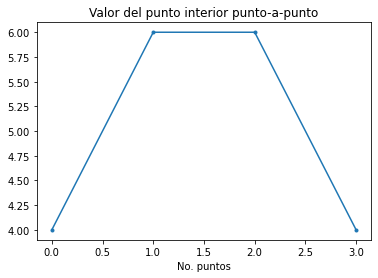

True

In [302]:
'''Ahora graficamos como se ve la operación punto a punto donde si nosotros "integramos" el área bajo la curva
o mejor dicho, sumamos todos los puntos notaremos que obtenemos el resultado de nuestra función'''

p_interior1 = p_interior(f_1,g_1) #Calculamos el punto interior con nuestra función
plt.plot(f_1*g_1,'.-')
plt.title('Valor del punto interior punto-a-punto')
plt.xlabel('No. puntos')
plt.show()

(f_1*g_1).sum()==p_interior1 #Comprobamos que nuestra función arroja el mismo resultado. 

#### La convolución

La segunda de las operaciones fundamentales sobre la que reposa la WCT, es la convolución, la cual podemos entender en palabras simples como un operador que toma dos funciones y regresa una tercera función que cuenta con los elementos de ambas funciones ya que representa la magnitud en la que se superpone la primera función y la segunda función invertida y trasladada. Matemáticamente en el espacio de funciones continuas se expresa para dadas funciones $f$ y $g$ como: 

$$ f(t)\star g(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau) d\tau$$

Al igual que el producto interior, podemos traspasar la definición de la convolución al caso discreto, sean dos series $f_n$ y $g_n$ con $n$ puntos, la convolución se define como: 

$$f_n \star g_n = f[n]\star g[n] = \sum_{j=1}^{n} f[j]g[n-j]$$ 

###### Convolución en el dominio del tiempo 

Otra forma de visualizar a la convolución es como una forma iterativa de realizar el producto interior entre la primera función y la segunda función en corrimiento, es decir, realizar el producto interior entre la función $f(t)$ y cada una de las funciones $g(\tau) = g(t-\tau)$ para los valores $\tau$ dentro de un intervalo,
el cual usualmente es el dominio de la función $g$ o un sub-conjunto de éste. En la animación podemos visualizar esta descripción, donde cada frame de la misma representa el producto interior entre la función $f$ (función de respuesta de un capacitor) y la función $g$ (función de un pulso cuadrado) que se va recorriendo de acuerdo a un valor $\tau$, el resultado de estas operaciones se va graficando en la parte de abajo [1].

![Convolucion gif](https://upload.wikimedia.org/wikipedia/commons/4/42/Convolucion_de_entrada_con_respuesta_al_impulso.gif)

Una anotación importante, la cual se describirá más a fondo más a delante, es el hecho  que se suele emplear funciones $g$ de un cierto tipo, llamadas funciones de soporte compacto, que no es otra cosa que funciones que se encuentran acotadas dentro de un sub-conjunto finito (llamado soporte) $X$ de su dominio $\mathcal{D}$ tal que $X \subset \mathcal{D}$, donde sus valores son distintos de 0; fuera de este sub-conjunto la función es 0, dicho de otra forma, en una función de soporte compacto existe un intervalo finito y acotado de valores para los cuales la función es distinta de 0. Ésta cualidad tomará relevancia cuando se describan las características de las onduletas o wavelets.

Un detalle importante que debemos detallar sobre la convolución en el caso discreto, es la relación que existe entre las longitudes de las series $f_n$ de longitud $n$ y $g_m$ $m$ y su resultado de la convolución. Dada la naturaleza de la operación la serie resultante de la convolución tendrá un mayor o menor número de puntos que la serie $f_n$. En el primer caso, si se decie comenzar a realizar los productos interiores entre ambas series de tal forma que el primer punto de la serie $f_n$ coincida con el último punto de la serie $g_n$, entonces el resultado de la convolución tendrá una longitud menor a $n$ por la naturaleza del producto interior donde se concentra información de longitud $m$ (del producto interior de una sección de la serie $f_n$ con la serie $g_m$ que se desplaza) en un solo valor, el resultado de la operación. Elegir esta opción, no es viable para realizar los análisis ya que se obtiene muy poca información temporal de la serie $f_n$. La alternativa a esta problemática es elegir comenzar la convolución de tal forma que el primer punto de la serie $f_n$ coincida con la de la serie $g_m$ (como se observa en la figura); sin embargo, para poder realizar este arreglo y poder calcular un producto interior válido es necesario realizar un paso previo que consiste en ancamar a la serie $f_n$, es decir añadir un número de valores igual a 0 al comienzo y al final, el número de valores añadidos $k$ está en función de $m$, tal que $k = \lceil m/2 \rceil$ donde $\lceil * \rceil$ denota a la función piso. Con esto mente, realizamos la convolución habitualmente y obtendremos que la longitud del resultado $r_p$ será de longitud $p = n+m-1$, es posible recortar esta serie $r_p$ para recuperar la longitud de $f_n$. Realizando la convolución de esta manera maximizamos la información temporal adquirida.

![Ejemplo convolución](conv.png)

Con la definición de la convolución discreta en el dominio del tiempo, de igual forma es sencillo definir una función en Python que realice esta operación aprovechando la función para calcular el producto interior previamente definida, como sigue:

In [331]:
def conv_tiempo(f,g): #Definimos nuestra función para dos arrays f y g  
    n,m = len(f),len(g) #Obtenemos las longitudes de las series
    k = int(m/2) #Obtenemos el número de elementos a añadir en f para el encamado
    '''Encamado de la serie f'''
    f_pad = np.pad(f,(k,k),'constant') #Encamamos la serie usando el módulo de numpy pad()
    #El primer parámetro es el array a encamar, el segundo es la longitud de puntos a añadir al inicio 
    #y al final (k,k), el último parámetro indica que los valores serán constantes igual a 0
    '''Proceso de convolución'''
    p=n+m-1 #Longitud del resultado de la convolución
    conv = np.zeros(p) #Definimos el array donde se almacenarán los resultados de los productos punto
    for ti in range(len(f_pad)-m): #Establecemos el ciclo iterativo para los productos interiores
        f_temp = f_pad[ti:ti+m] #Extraemos el segmento de la serie f correspondiente
        g_temp = np.flip(g) #Invertimos la serie g 
        conv[ti+k] = p_interior(f_temp,g_temp) #Realizamos el producto interior y lo almacenamos
    '''Recortado del resultado'''
    conv_cut = conv[k:-k+1]
    return conv_cut

Para probar nuestra función de convolución en el tiempo, emplearemos la serie de EEG y un pulso cuadrado:

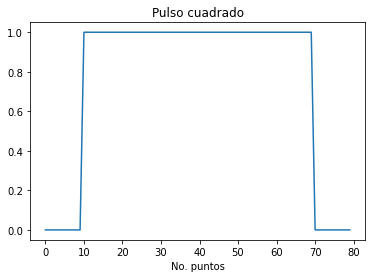

In [332]:
def cuadrado(m): #Función para crear una serie de pulso cuadrado con longitud m 
    pulso = np.ones(m) #Definimos que el pulso tendrá m número de unos
    pulso = np.pad(pulso,(10,10),'constant') #Establecemos que el pulso tendrá 10 valores 0 a los costados
    return pulso
pulso_c = cuadrado(60)
plt.plot(pulso_c)
plt.title('Pulso cuadrado')
plt.xlabel('No. puntos')
plt.show()

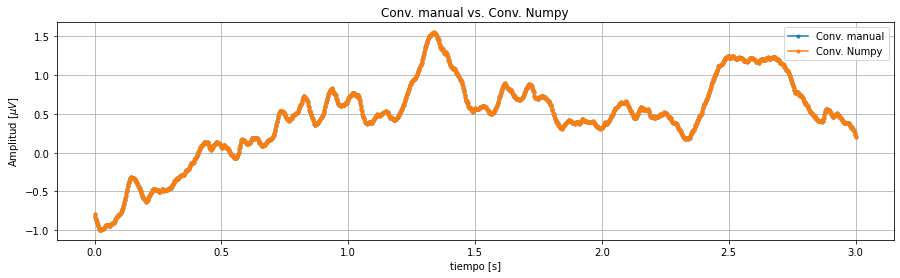

In [341]:
conv_1 = conv_tiempo(EEG,pulso_c)
conv_1_py = np.convolve(EEG,pulso_c,mode='same')

fig, ax = plt.subplots(1,1,figsize=(15,4))
time=np.linspace(0,3,1500)
ax.plot(time,conv_1,'.-',label='Conv. manual')
ax.plot(time,conv_1_py,'.-',label='Conv. Numpy')
ax.set_xlabel('tiempo [s]')
ax.set_ylabel(f'Amplitud [$\mu V$]')
ax.set_title('Conv. manual vs. Conv. Numpy')
ax.legend()
ax.grid()
plt.show()

#####  El teorema de la convolución 
    -- Convolución Rápida por medio del dominio de la frecuencia --



### Descomposición Wavelet



### Wavelets - los kernels

In [318]:
len(conv_1)

1499

### Transformada Contínua Wavelet